# Part I - Loan Data from Prosper
## by (Tuancnh)

## Introduction

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [55]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [56]:

df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [57]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [59]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In this dataset, I saw that it have many columns are not unnecessary, so I have to remove and choose the data is meaningful  

In [60]:

loan_new_df = df[['ListingCreationDate', 'LoanOriginalAmount', 'LoanStatus', 'ListingCategory (numeric)', 'BorrowerState', 'BorrowerAPR','BorrowerRate', 'StatedMonthlyIncome',
             'Term', 'EmploymentStatus', 'MonthlyLoanPayment','ProsperRating (Alpha)']]

# High-level overview of data shape and composition
print(loan_new_df.shape)
print(loan_new_df.info())


(113937, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   LoanOriginalAmount         113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   BorrowerState              108422 non-null  object 
 5   BorrowerAPR                113912 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   EmploymentStatus           111682 non-null  object 
 10  MonthlyLoanPayment         113937 non-null  float64
 11  ProsperRating (Alpha)      84853 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 10.4+ MB
None


In [61]:
print(loan_new_df.sample(10))

                  ListingCreationDate  LoanOriginalAmount  LoanStatus  \
69130   2012-11-30 04:52:04.020000000               14000     Current   
45058   2012-10-03 08:00:40.437000000                4000     Current   
5138    2013-08-09 17:46:08.193000000                7000     Current   
108151  2012-04-30 09:35:50.640000000                5500   Completed   
28882   2013-11-21 14:01:22.077000000                2000     Current   
90036   2014-01-11 22:16:29.430000000               20000     Current   
99048   2009-09-02 08:50:09.890000000                3000   Completed   
70031   2012-03-15 11:36:15.427000000                4000   Completed   
108606  2014-01-14 16:37:35.977000000               20000     Current   
24395   2010-11-18 23:52:38.807000000               10000  Chargedoff   

        ListingCategory (numeric) BorrowerState  BorrowerAPR  BorrowerRate  \
69130                           1            GA      0.17982        0.1564   
45058                          15       

In [62]:
loan_new_df.head()

,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,EmploymentStatus,MonthlyLoanPayment,ProsperRating (Alpha)
0,2007-08-26 19:09:29.263000000,9425,Completed,0,CO,0.16516,0.1580,3083.333333,36,Self-employed,330.43,NaN
1,2014-02-27 08:28:07.900000000,10000,Current,2,CO,0.12016,0.0920,6125.000000,36,Employed,318.93,A
2,2007-01-05 15:00:47.090000000,3001,Completed,0,GA,0.28269,0.2750,2083.333333,36,Not available,123.32,NaN
3,2012-10-22 11:02:35.010000000,10000,Current,16,GA,0.12528,0.0974,2875.000000,36,Employed,321.45,A
4,2013-09-14 18:38:39.097000000,15000,Current,2,MN,0.24614,0.2085,9583.333333,36,Employed,563.97,D


I need to drop the duplicated data

In [63]:
loan_new_df = loan_new_df.drop_duplicates();

In [64]:
print(loan_new_df.head());

             ListingCreationDate  LoanOriginalAmount LoanStatus  \
0  2007-08-26 19:09:29.263000000                9425  Completed   
1  2014-02-27 08:28:07.900000000               10000    Current   
2  2007-01-05 15:00:47.090000000                3001  Completed   
3  2012-10-22 11:02:35.010000000               10000    Current   
4  2013-09-14 18:38:39.097000000               15000    Current   

   ListingCategory (numeric) BorrowerState  BorrowerAPR  BorrowerRate  \
0                          0            CO      0.16516        0.1580   
1                          2            CO      0.12016        0.0920   
2                          0            GA      0.28269        0.2750   
3                         16            GA      0.12528        0.0974   
4                          2            MN      0.24614        0.2085   

   StatedMonthlyIncome  Term EmploymentStatus  MonthlyLoanPayment  \
0          3083.333333    36    Self-employed              330.43   
1          6125.0000

In [65]:
loan_new_df.ListingCreationDate = pd.to_datetime(loan_new_df.ListingCreationDate, format='mixed')
# Splitting ListingCreationDate column into year,month,day,time
#using the apply function, applying the strftime function to each value of the timestamp column in each row
loan_new_df['date'] = loan_new_df['ListingCreationDate'].apply(lambda x: x.strftime('%d-%m-%Y'))
loan_new_df['time'] = loan_new_df['ListingCreationDate'].apply(lambda x: x.strftime('%H:%M:%S'))

#changing datatype of the date column to datetime
loan_new_df.date = pd.to_datetime(loan_new_df.date, dayfirst = True)

In [66]:
loan_new_df.drop(columns = ['ListingCreationDate'],inplace = True)
loan_new_df.head(10)


,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,EmploymentStatus,MonthlyLoanPayment,ProsperRating (Alpha),date,time
0,9425,Completed,0,CO,0.16516,0.1580,3083.333333,36,Self-employed,330.43,NaN,2007-08-26,19:09:29
1,10000,Current,2,CO,0.12016,0.0920,6125.000000,36,Employed,318.93,A,2014-02-27,08:28:07
2,3001,Completed,0,GA,0.28269,0.2750,2083.333333,36,Not available,123.32,NaN,2007-01-05,15:00:47
3,10000,Current,16,GA,0.12528,0.0974,2875.000000,36,Employed,321.45,A,2012-10-22,11:02:35
4,15000,Current,2,MN,0.24614,0.2085,9583.333333,36,Employed,563.97,D,2013-09-14,18:38:39
5,15000,Current,1,NM,0.15425,0.1314,8333.333333,60,Employed,342.37,B,2013-12-14,08:26:37
6,3000,Current,1,KS,0.31032,0.2712,2083.333333,36,Employed,122.67,E,2013-04-12,09:52:56
7,10000,Current,2,CA,0.23939,0.2019,3355.750000,36,Employed,372.60,C,2013-05-05,06:49:27
8,10000,Current,7,IL,0.07620,0.0629,3333.333333,36,Employed,305.54,AA,2013-12-02,10:43:39
10,13500,Current,1,MD,0.27462,0.2489,7500.000000,60,Employed,395.37,C,2012-05-10,07:04:01


In [67]:
loan_new_df['ListingCategory (TEXT)'] = loan_new_df['ListingCategory (numeric)']
loan_new_df['ListingCategory (numeric)'] = loan_new_df['ListingCategory (numeric)'].replace({
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby&Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'})

loan_new_df['ListingCategory (numeric)'].dtype

dtype('O')

In [68]:
#Let's display information about the cleaned dataset
loan_new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginalAmount         113066 non-null  int64         
 1   LoanStatus                 113066 non-null  object        
 2   ListingCategory (numeric)  113066 non-null  object        
 3   BorrowerState              107551 non-null  object        
 4   BorrowerAPR                113041 non-null  float64       
 5   BorrowerRate               113066 non-null  float64       
 6   StatedMonthlyIncome        113066 non-null  float64       
 7   Term                       113066 non-null  int64         
 8   EmploymentStatus           110811 non-null  object        
 9   MonthlyLoanPayment         113066 non-null  float64       
 10  ProsperRating (Alpha)      83982 non-null   object        
 11  date                       113066 non-null  datetime64[ns

In [69]:
loan_new_df.head(10)

,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerState,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,EmploymentStatus,MonthlyLoanPayment,ProsperRating (Alpha),date,time,ListingCategory (TEXT)
0,9425,Completed,Not Available,CO,0.16516,0.1580,3083.333333,36,Self-employed,330.43,NaN,2007-08-26,19:09:29,0
1,10000,Current,Home Improvement,CO,0.12016,0.0920,6125.000000,36,Employed,318.93,A,2014-02-27,08:28:07,2
2,3001,Completed,Not Available,GA,0.28269,0.2750,2083.333333,36,Not available,123.32,NaN,2007-01-05,15:00:47,0
3,10000,Current,Motorcycle,GA,0.12528,0.0974,2875.000000,36,Employed,321.45,A,2012-10-22,11:02:35,16
4,15000,Current,Home Improvement,MN,0.24614,0.2085,9583.333333,36,Employed,563.97,D,2013-09-14,18:38:39,2
5,15000,Current,Debt Consolidation,NM,0.15425,0.1314,8333.333333,60,Employed,342.37,B,2013-12-14,08:26:37,1
6,3000,Current,Debt Consolidation,KS,0.31032,0.2712,2083.333333,36,Employed,122.67,E,2013-04-12,09:52:56,1
7,10000,Current,Home Improvement,CA,0.23939,0.2019,3355.750000,36,Employed,372.60,C,2013-05-05,06:49:27,2
8,10000,Current,Other,IL,0.07620,0.0629,3333.333333,36,Employed,305.54,AA,2013-12-02,10:43:39,7
10,13500,Current,Debt Consolidation,MD,0.27462,0.2489,7500.000000,60,Employed,395.37,C,2012-05-10,07:04:01,1


### What is the structure of your dataset?

> the dataset includes 113,937 loans and 81 variables, Rows = 113,066 and Columns = 12

### What is/are the main feature(s) of interest in your dataset?

> The EmploymentStatus will be analysed with some factors such as the loan status and term. Let's find out the Employment Status of the borrowers

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the Listing Category, borrower's rate and Loan original amount will be the most important features and use to analytic some various features.

## Univariate Exploration

> First, I will categorize by employee status



In [70]:
loan_new_df.EmploymentStatus.value_counts()

EmploymentStatus
Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: count, dtype: int64

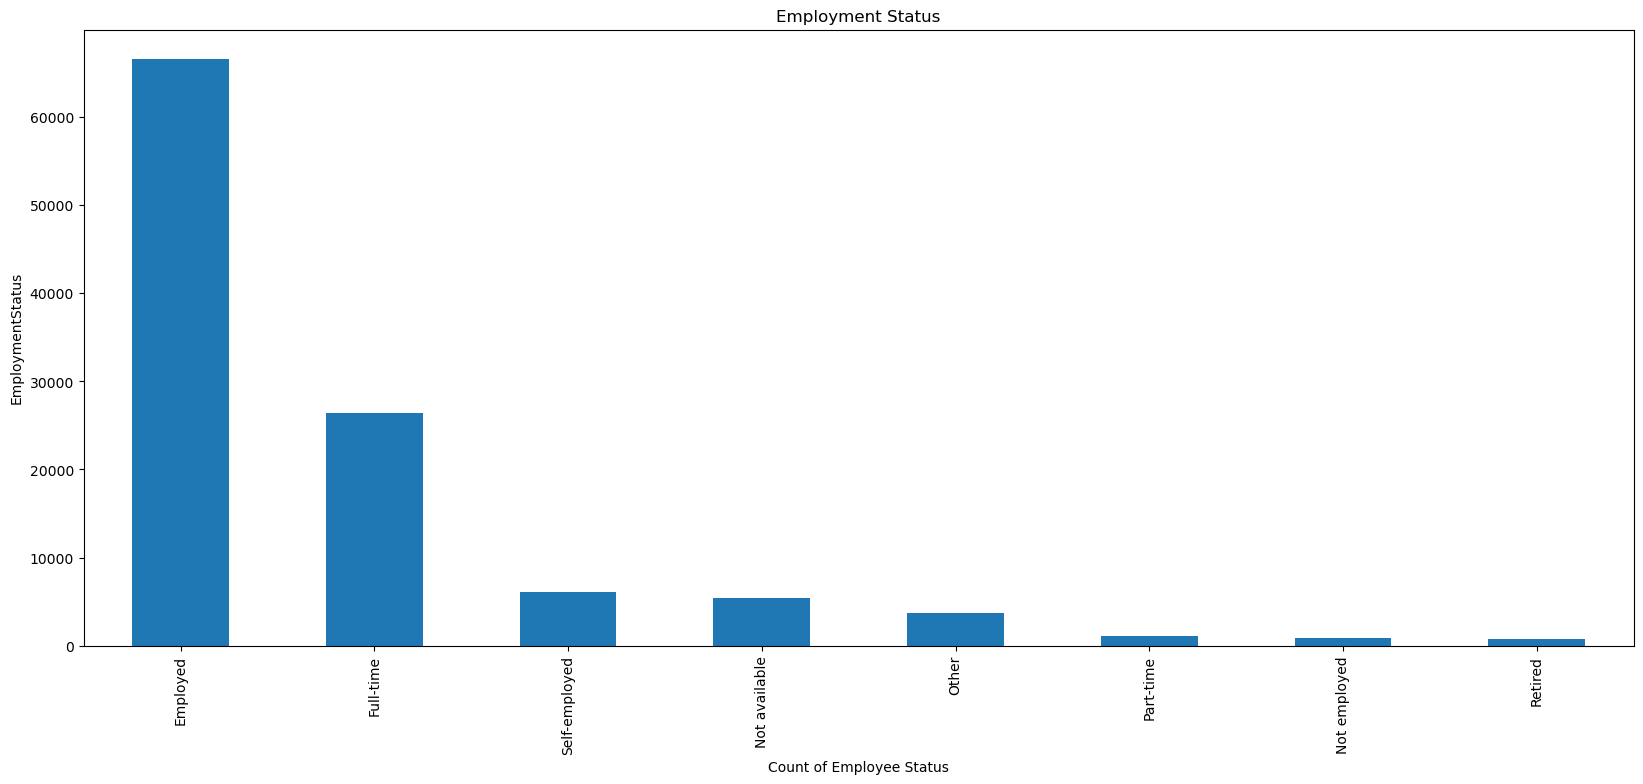

In [71]:
loan_new_df['EmploymentStatus'].value_counts().plot(kind='bar')
plt.title('Employment Status')
plt.xlabel('Count of Employee Status')
plt.ylabel('EmploymentStatus')
plt.fontsize = 10
plt.figsize=(8,8)

Now, We analytic Loan status

In [72]:
loan_new_df['LoanStatus'].value_counts()

LoanStatus
Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution Of LoanStatus')

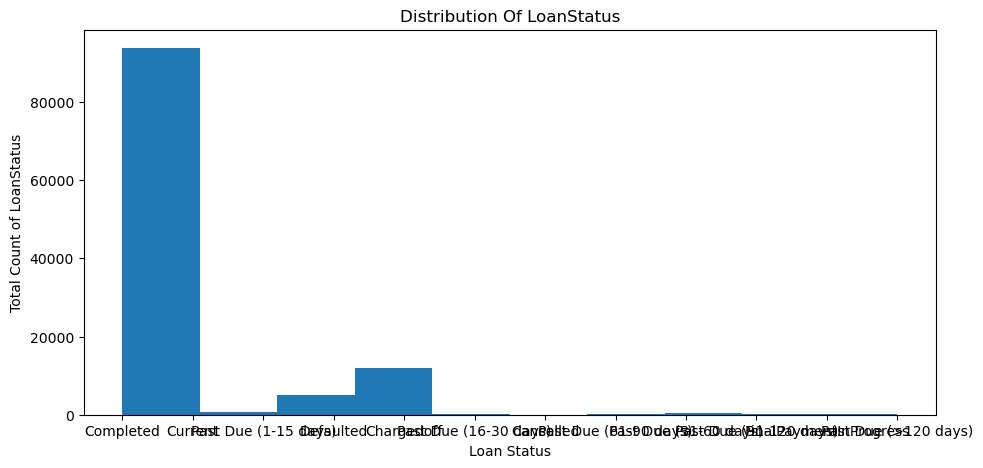

In [73]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 5
bins = np.arange(0, 20, 0.01)
plt.hist(data = loan_new_df, x = 'LoanStatus')

plt.xlabel('Loan Status')
plt.ylabel('Total Count of LoanStatus')
plt.title('Distribution Of LoanStatus')


Text(0.5, 1.0, 'Histogram Of Borrower APR')

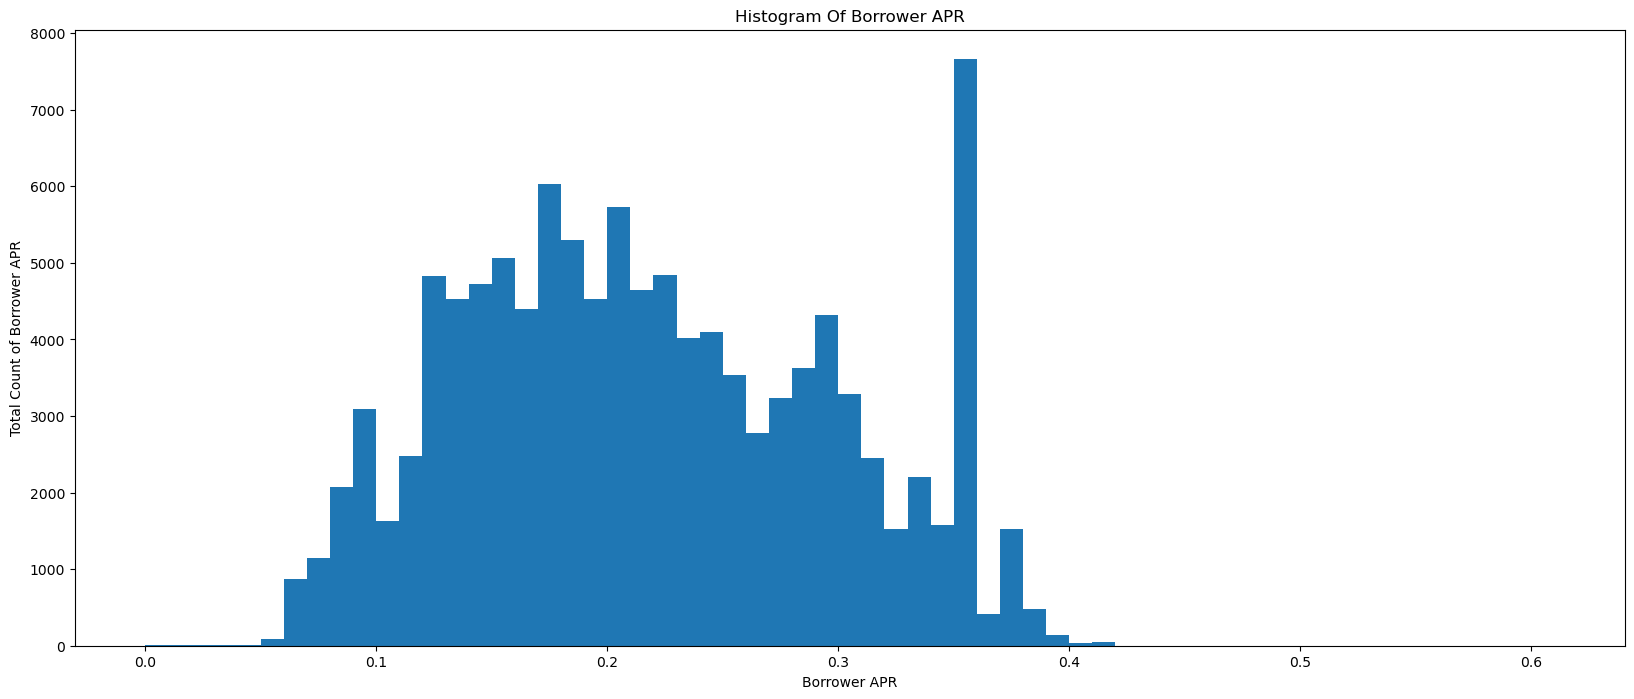

In [74]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 8
bins = np.arange(0, loan_new_df.BorrowerAPR.max() + 0.1, 0.01)
plt.hist(data = loan_new_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count of Borrower APR')
plt.title('Histogram Of Borrower APR')

In [75]:
# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_new_df['Term'] = loan_new_df['Term'].astype(ordered_var)
loan_new_df.info()

loan_new_df['Term'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LoanOriginalAmount         113066 non-null  int64         
 1   LoanStatus                 113066 non-null  object        
 2   ListingCategory (numeric)  113066 non-null  object        
 3   BorrowerState              107551 non-null  object        
 4   BorrowerAPR                113041 non-null  float64       
 5   BorrowerRate               113066 non-null  float64       
 6   StatedMonthlyIncome        113066 non-null  float64       
 7   Term                       113066 non-null  category      
 8   EmploymentStatus           110811 non-null  object        
 9   MonthlyLoanPayment         113066 non-null  float64       
 10  ProsperRating (Alpha)      83982 non-null   object        
 11  date                       113066 non-null  datetime64[ns

Term
36    87224
60    24228
12     1614
Name: count, dtype: int64

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


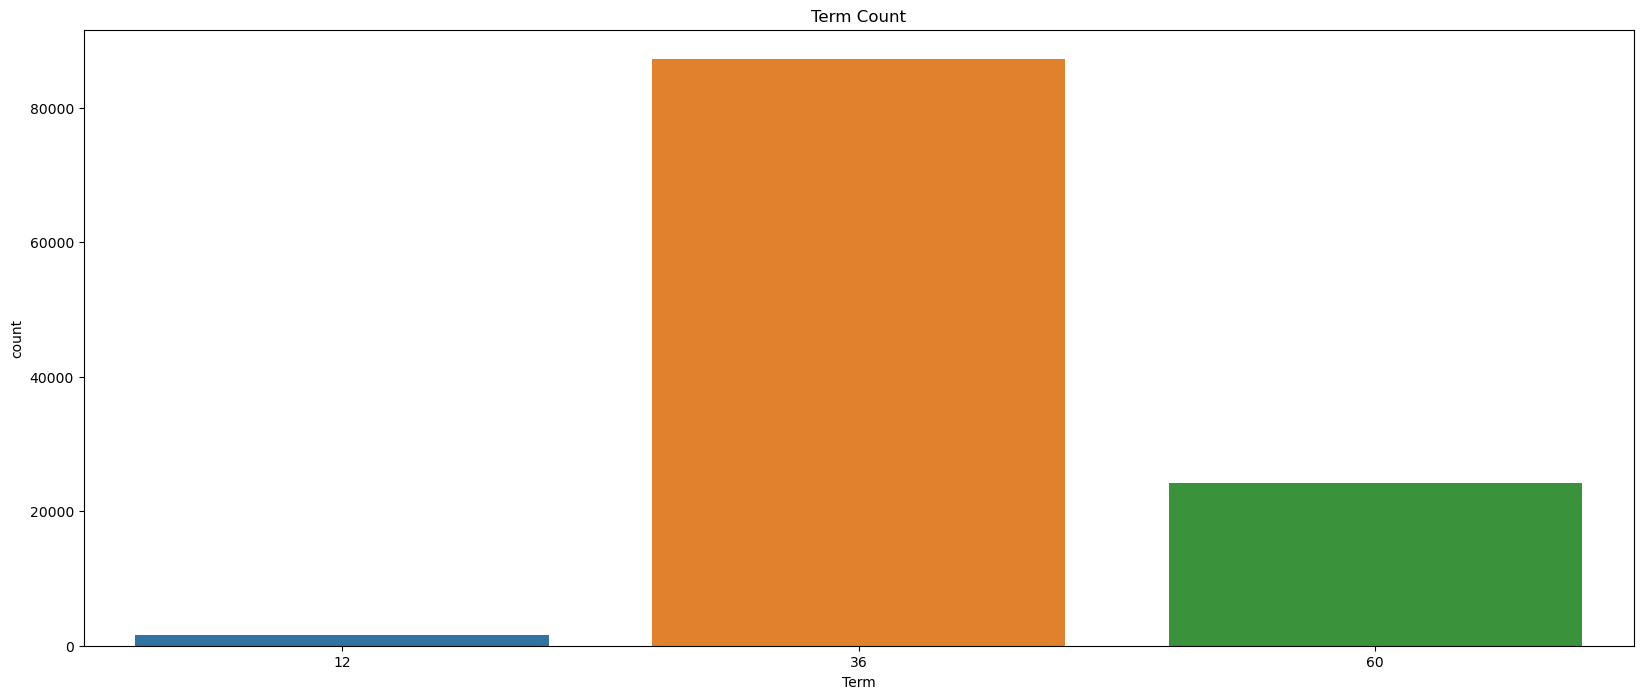

In [76]:
sb.countplot(data = loan_new_df, x = 'Term');
plt.title('Term Count');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The majority of borrowers are currently employed and work full-time, most of the loans in the data set are actually current loans, and  the highest loan term is 36

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are  current loans. When my main goal declear the factors of outcome of loan we are not interested in any current loans, so we will need to it

## Bivariate Exploration

> Now, I try to investigate the relationship between Loan Status and Loan original Ammount 

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


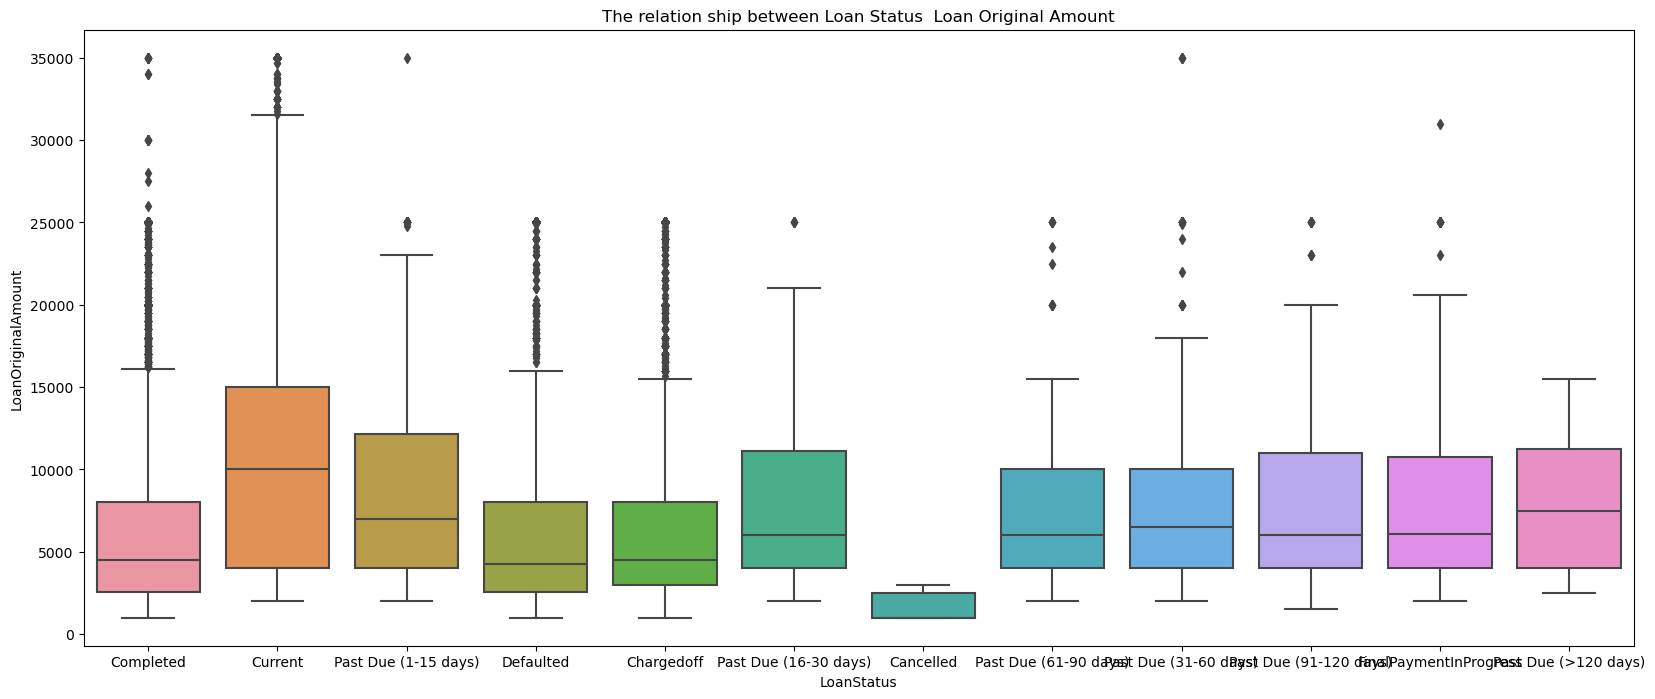

In [77]:
sb.boxplot(data = loan_new_df, x = 'LoanStatus', y = 'LoanOriginalAmount');
plt.title('The relationship between Loan Status  Loan Original Amount');

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


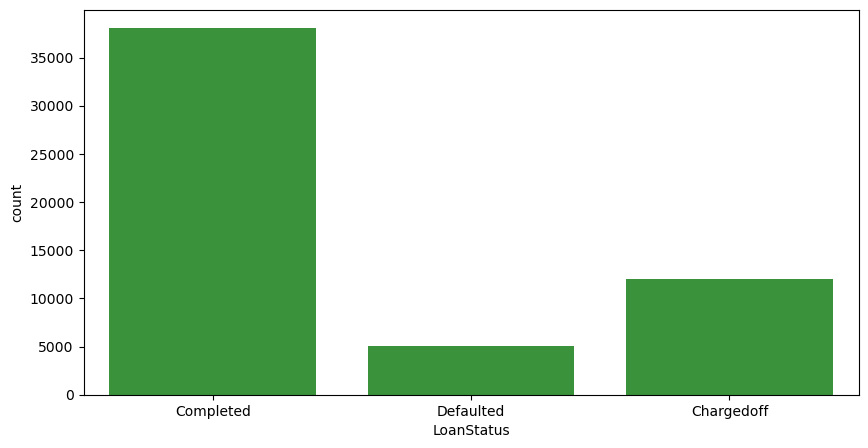

In [78]:

loan_new_df = loan_new_df.query('LoanStatus in ["Defaulted", "Completed", "Chargedoff"]')
plt.figure(figsize=(10, 5));
b_color=sb.color_palette()[2]
sb.countplot(x='LoanStatus', data=loan_new_df, color=b_color);

What is the Relationship Between Loan Status and Employment Status?

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

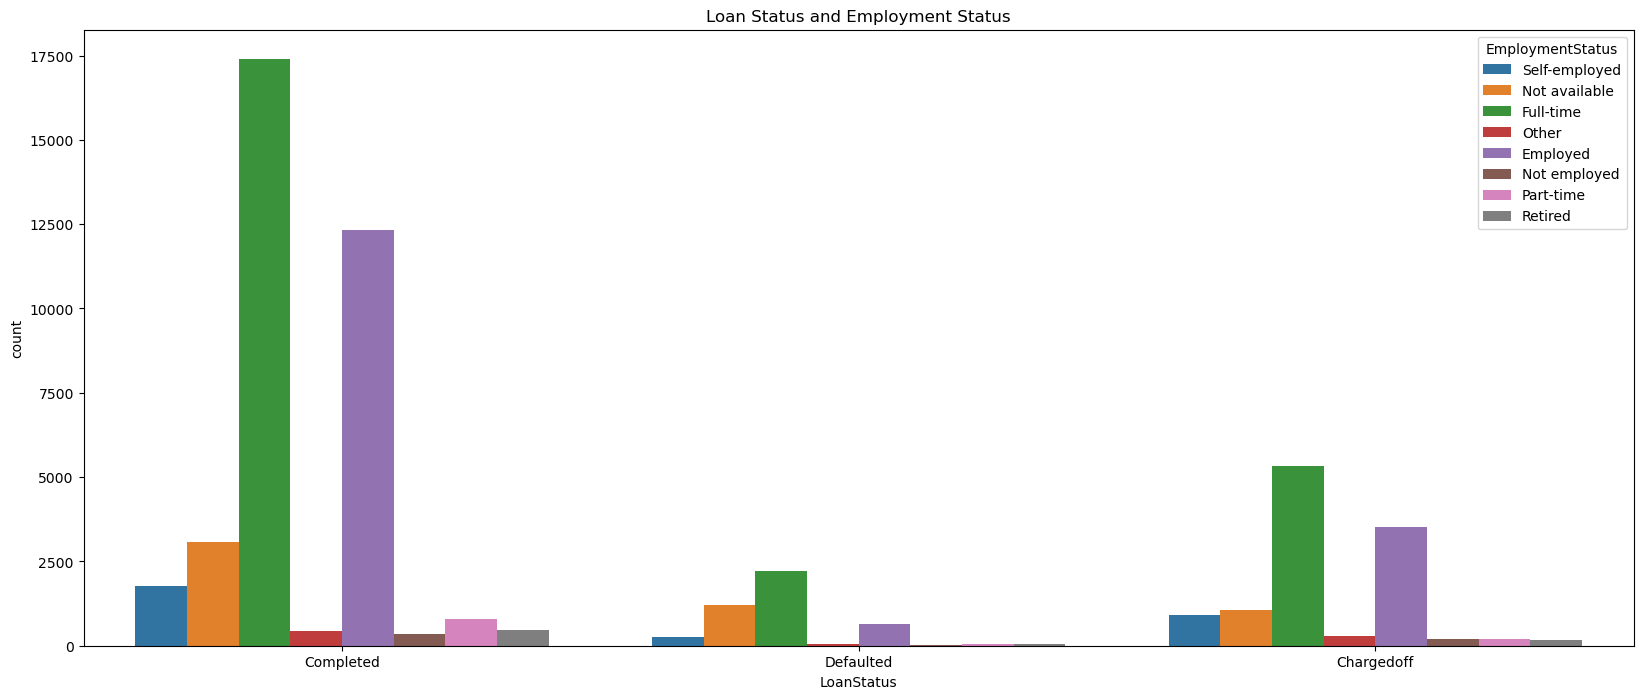

In [79]:
sb.countplot(data = loan_new_df, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.title('Loan Status and Employment Status');

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


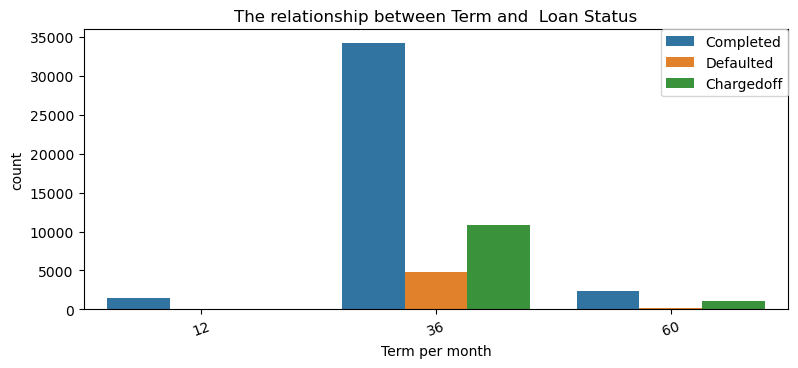

In [80]:
plt.subplot(2,2,3)
sb.countplot(data = loan_new_df, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 20)
plt.legend(bbox_to_anchor=(1, 1),
           borderaxespad=0)
plt.xlabel('Term per month')
plt.title('The relationship between Term and  Loan Status');

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


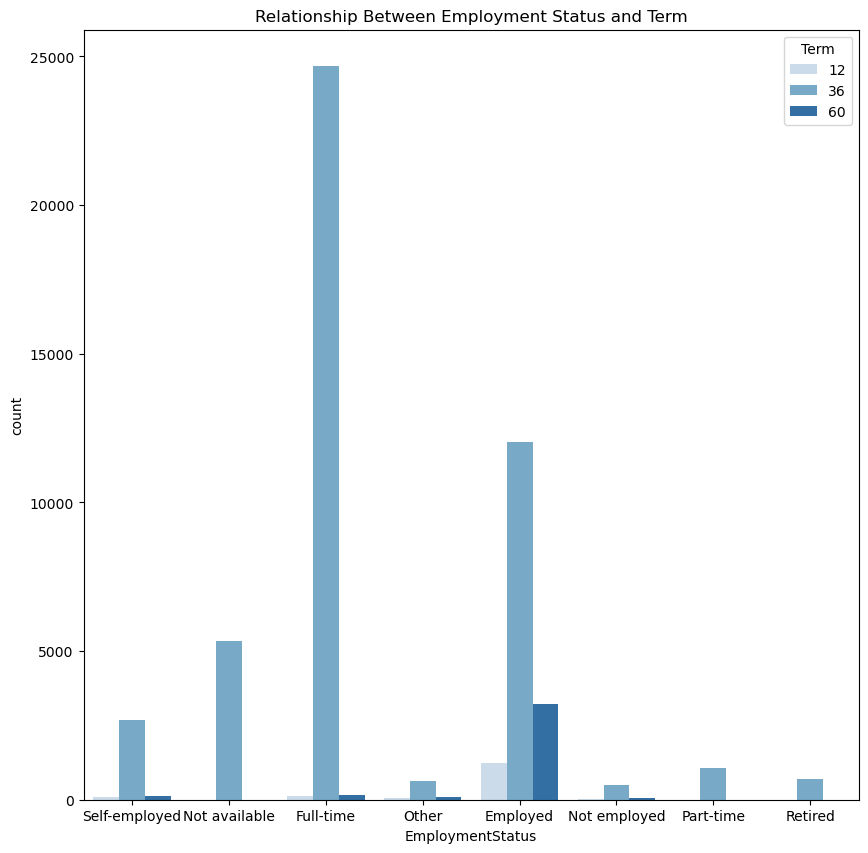

In [81]:
plt.figure(figsize = [10, 10])
sb.countplot(data = loan_new_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');
plt.title('Relationship Between Employment Status and Term');

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


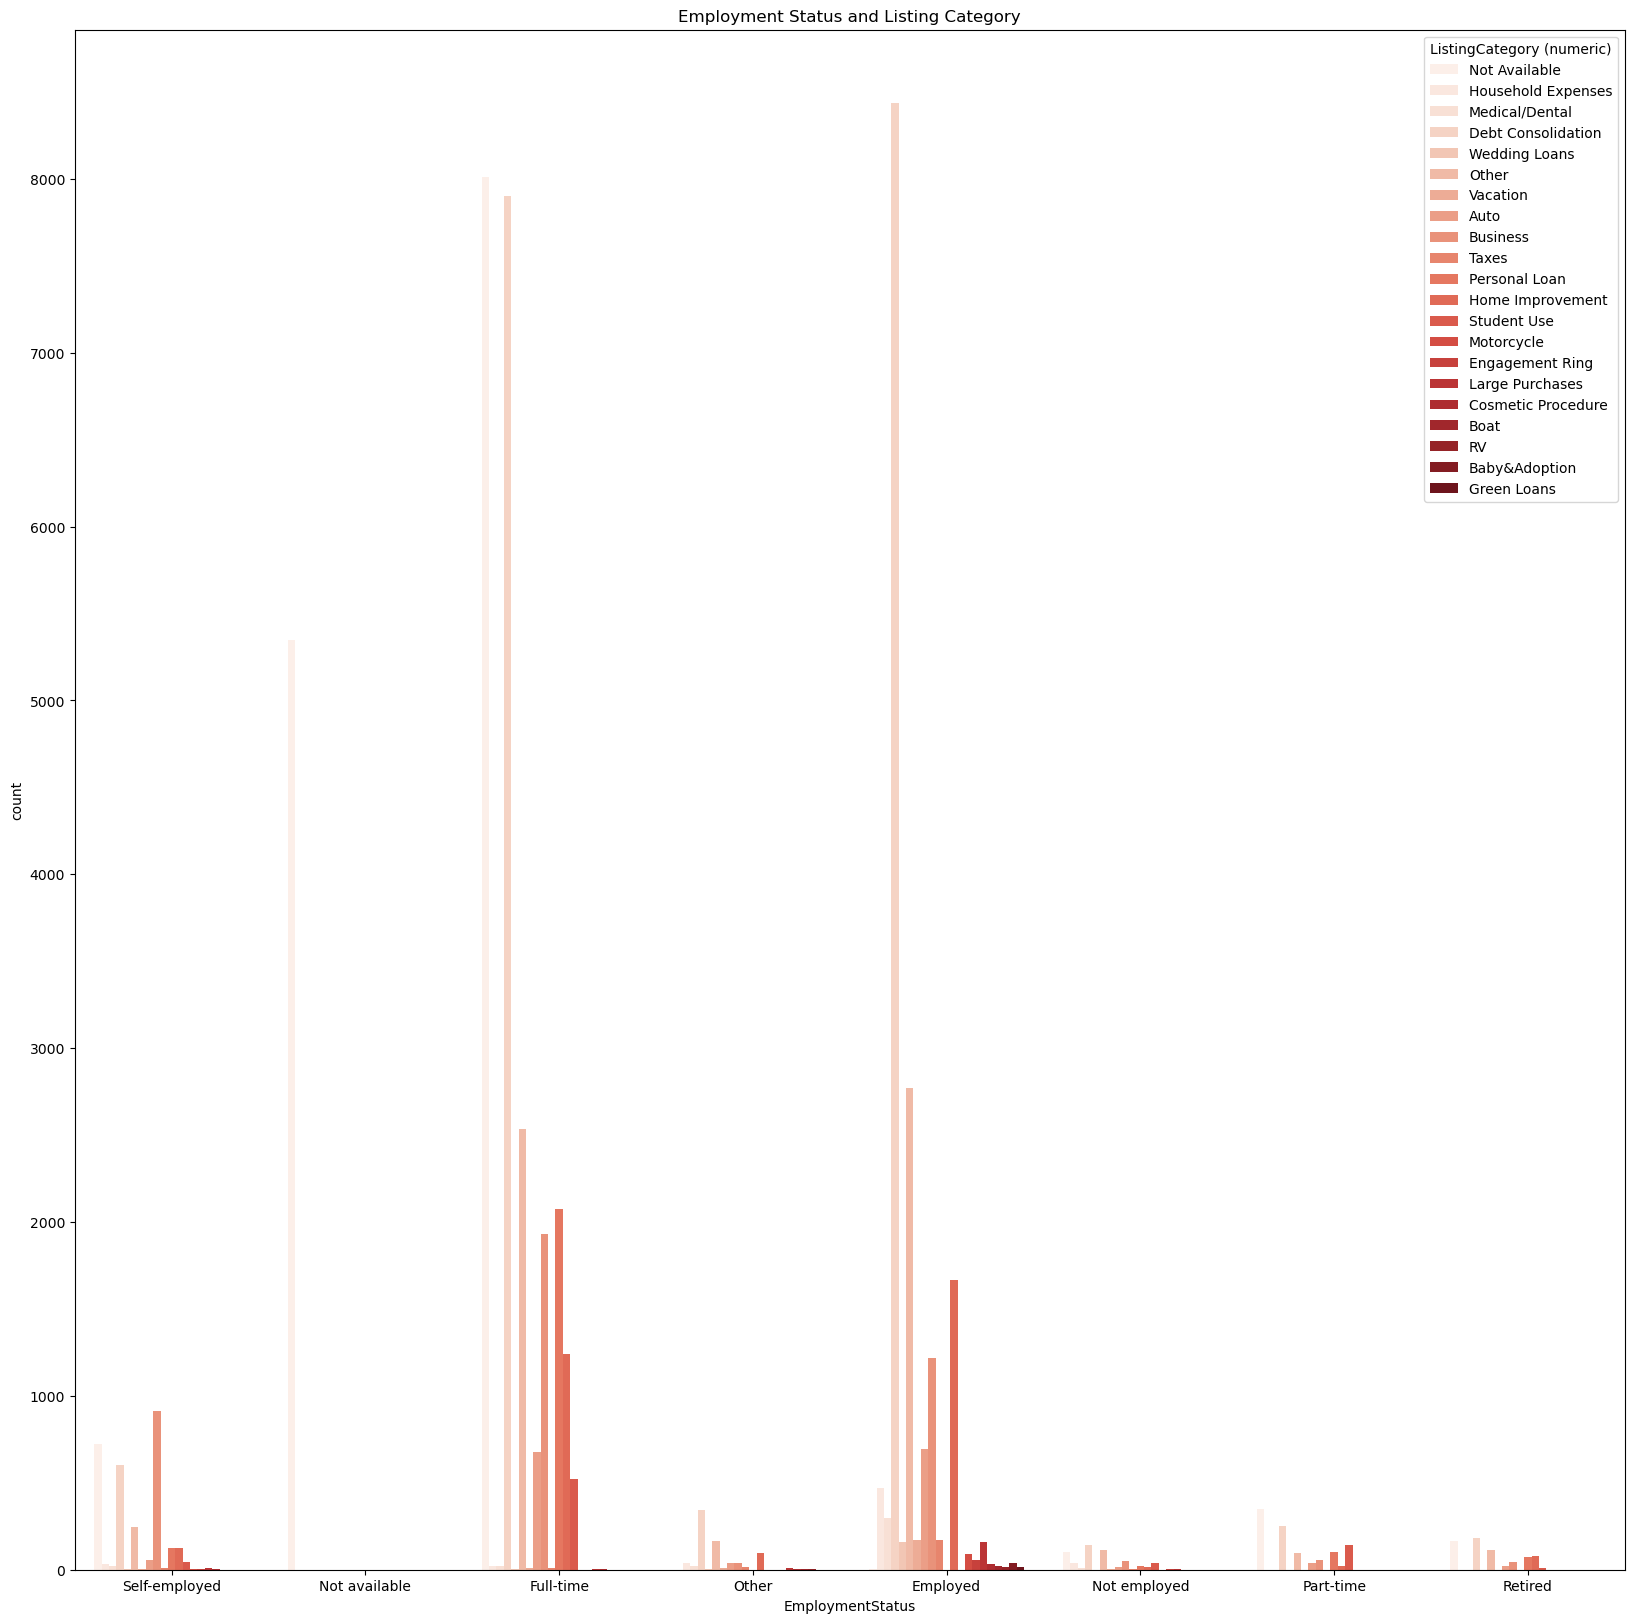

In [84]:
plt.figure(figsize = [20,20])
sb.countplot(data = loan_new_df, x = 'EmploymentStatus', hue = 'ListingCategory (numeric)', palette = 'Reds');
plt.title('Employment Status and Listing Category');

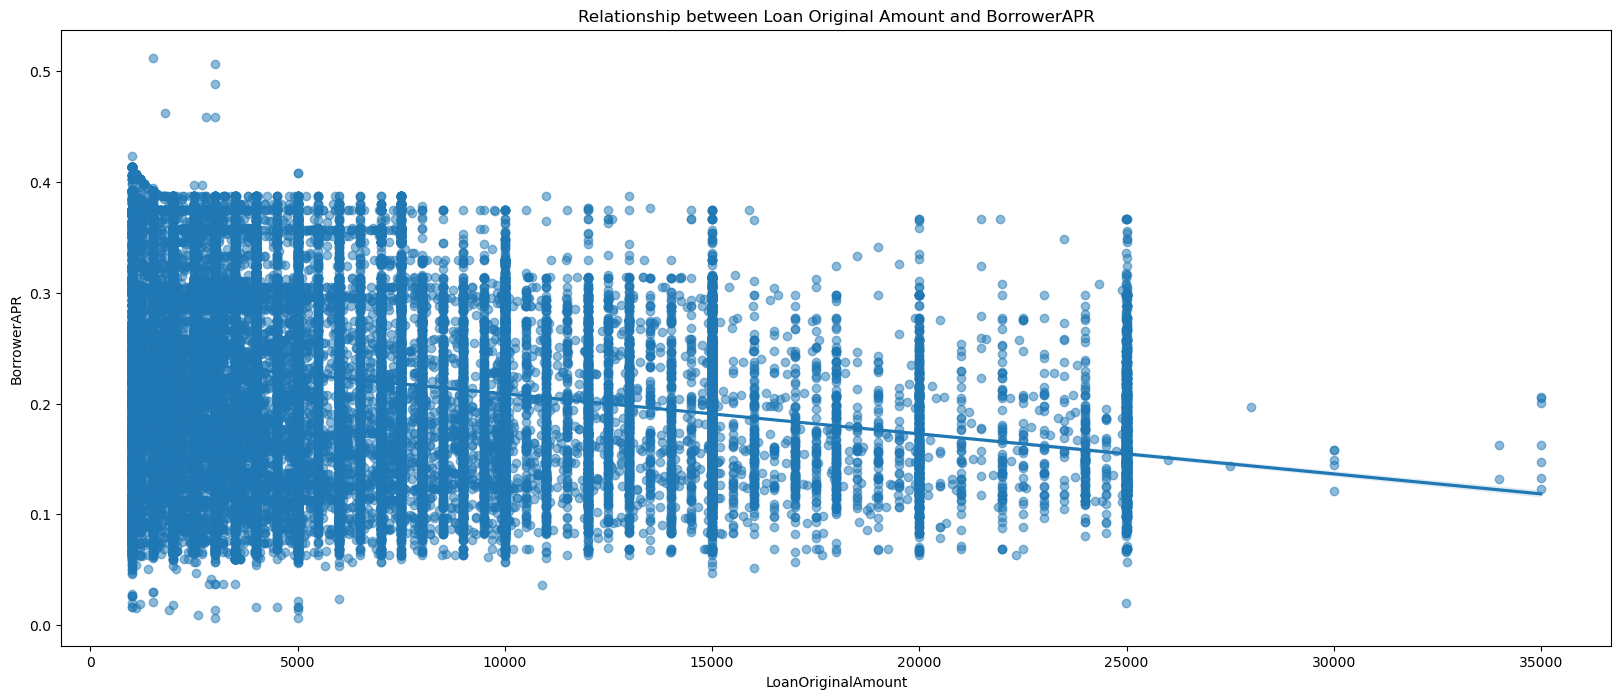

In [85]:
sb.regplot(data = loan_new_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.5}, x_jitter=0.5);
plt.title('Relationship between Loan Original Amount and BorrowerAPR');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The Full-time employed borrowers have a longer term loan of 36 months.
The highest borrower rate is Other followed by Not-employed borrowers.
The full time employed borrowers have completed their loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> LoanOriginalAmount and BorrowerAPR is having a strong negative relationship

## Multivariate Exploration

> I want to explore in this part of the analysis is how the categorical variable include: Prosper rating and term, besides I  try to show the relationship between borrower APR and loan original amount.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

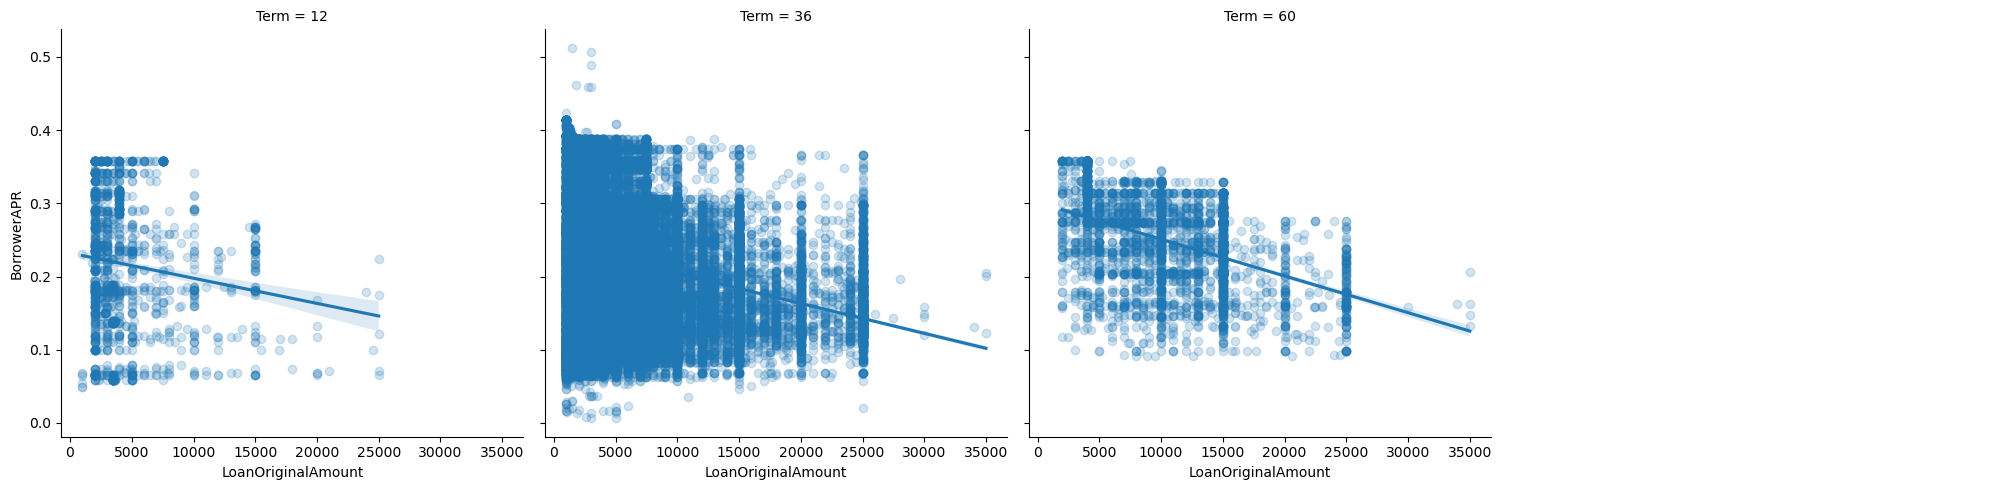

In [86]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_new_df, aspect=1, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.08, scatter_kws={'alpha':0.2});
g.add_legend();

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

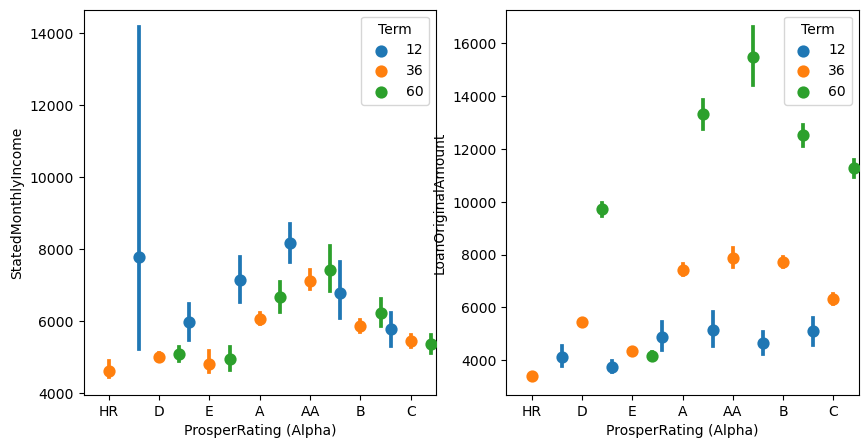

In [87]:
fig, ax = plt.subplots(ncols=2, figsize=[10,5])
sb.pointplot(data = loan_new_df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term', linestyles = '', dodge = 0.8, ax=ax[0])
sb.pointplot(data = loan_new_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term', linestyles = '', dodge = 0.8, ax=ax[1]);

With stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar with different ratings. Besides loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

## The relationship between Employment Status, Loan Original Amount and Stated Monthly Income

C:\Users\SamFisher\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


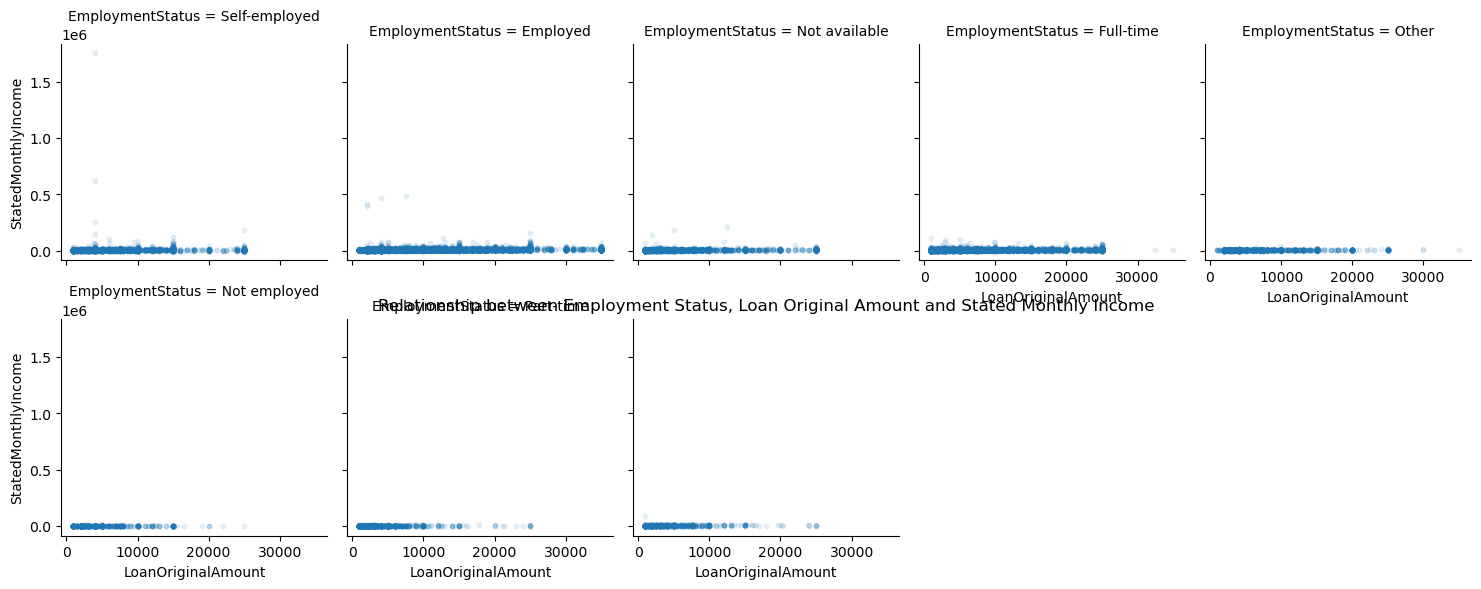

In [46]:
f = sb.FacetGrid(data=loan_new_df, col='EmploymentStatus', col_wrap=5)
f.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome', alpha=0.1, s=10);
plt.title('Relationship between Employment Status, Loan Original Amount and Stated Monthly Income');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Employed  has the highest Completed Loan and Retired employees has the lowest borrower APR on 12 months term

### Were there any interesting or surprising interactions between features?

> There is a positive relationship between the Stated Monthly Income and Loan Original Amount in every employment status category